# Preprocessing

In [1]:
# import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,}'.format
import seaborn as sns
%matplotlib inline

In [2]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Wage.csv"
Wage = pd.read_csv(url, index_col='SlNo')

In [3]:
Wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
SlNo,,,,,,,,,,,
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063334962759,75.0431540173515
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.25527250510331,70.47601964694451
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.8750612633917,130.982177377461
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041392685158231,154.68529299563
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063334962759,75.0431540173515


In [4]:
Wage.describe().round(2)

,year,age,logwage,wage
count,"3,000.0","3,000.0","3,000.0","3,000.0"
mean,"2,005.79",42.41,4.65,111.7
std,2.03,11.54,0.35,41.73
min,"2,003.0",18.0,3.0,20.09
25%,"2,004.0",33.75,4.45,85.38
50%,"2,006.0",42.0,4.65,104.92
75%,"2,008.0",51.0,4.86,128.68
max,"2,009.0",80.0,5.76,318.34


In [5]:
Wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 11 columns):
year          3000 non-null int64
age           3000 non-null int64
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 281.2+ KB


### Exploring relationships with other features in the Wage data set

### 'maritl' and 'jobclass'

*Basic exploration of the dataset*

In [15]:
Wage.maritl.value_counts(sort=True)

2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: maritl, dtype: int64

In [34]:
Wage.jobclass.value_counts(sort=True)

1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

Text(0.5,1,'wage as function of jobclass')

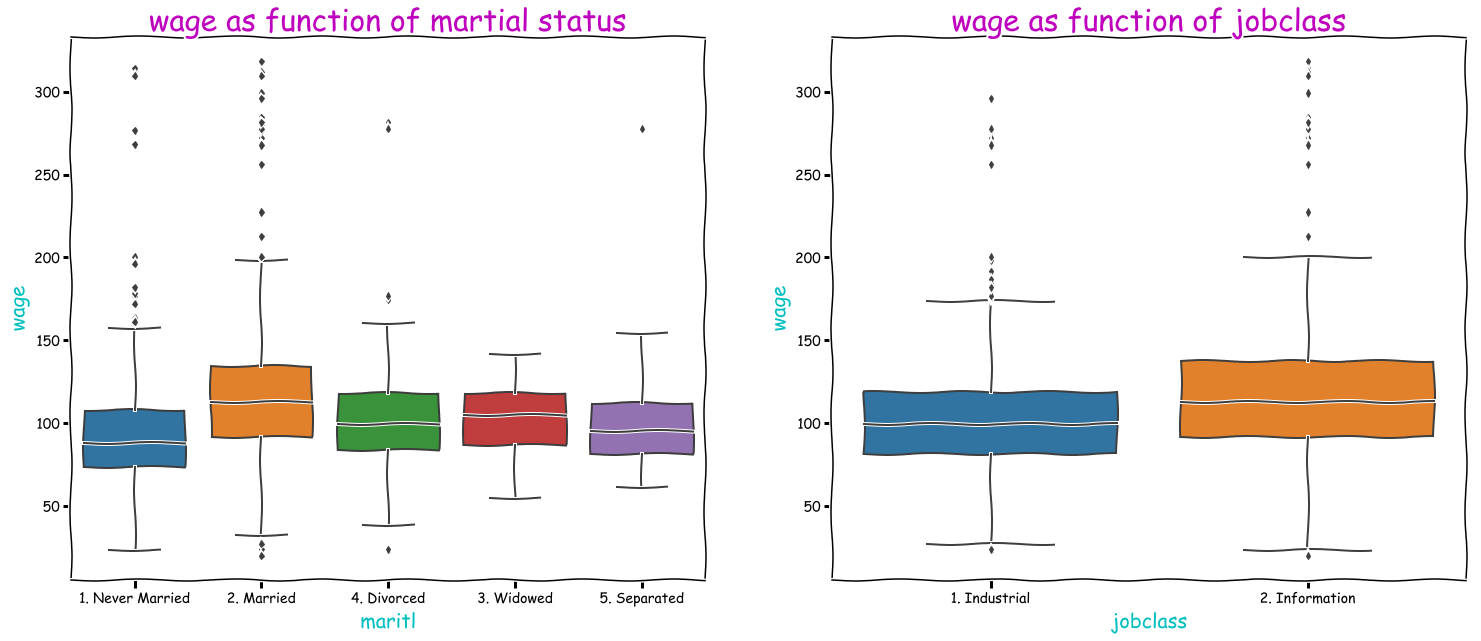

In [76]:
plt.xkcd()
fig, axes = plt.subplots(1, 2, figsize=(25,10))

sns.boxplot(Wage.maritl, Wage.wage, ax=axes[0])
axes[0].set_xlabel('maritl', fontsize=20, color='c')
axes[0].set_ylabel('wage', fontsize=20, color='c')
axes[0].set_title('wage as function of martial status', color='m', fontsize=30)


sns.boxplot(Wage.jobclass, Wage.wage, ax=axes[1])
axes[1].set_xlabel('jobclass', fontsize=20, color='c')
axes[1].set_ylabel('wage', fontsize=20, color='c')
axes[1].set_title('wage as function of jobclass', color='m', fontsize=30)

**Initial plots show married people and those in the the information sector make more money than their counterparts.**

**Polynomial regression**

*I cannot increase degrees of categorical variables like 'maritl' and 'jobclass'. Therefore, it will reduce to normal linear regression.*

In [89]:
X1 = Wage.maritl.astype('category').cat.codes
X2 = Wage.jobclass.astype('category').cat.codes
y = Wage.wage
df = pd.concat([y, X1, X2], axis=1)
df.columns = ['wage', 'maritl', 'jobclass']
df.head()

,wage,maritl,jobclass
SlNo,,,
231655,75.0431540173515,0,0
86582,70.47601964694451,0,1
161300,130.982177377461,1,0
155159,154.68529299563,1,1
11443,75.0431540173515,3,1


In [90]:
lm1 = ols('df.wage~df.maritl', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                df.wage   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     13.66
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           0.000222
Time:                        11:05:09   Log-Likelihood:                -15443.
No. Observations:                3000   AIC:                         3.089e+04
Df Residuals:                    2998   BIC:                         3.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.3063      1.193     90.805      0.000     105.968     110.645
df.maritl      3.4620      0.937      3.697      0.000       1.626       5.298
==============================================================================
Omnibus:                     1063.089   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4418.764
Skew:                           1.695   Prob(JB):                         0.00
Kurtosis:                       7.885   Cond. No.                         2.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
lm2 = ols('df.wage~df.jobclass', data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                df.wage   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     134.1
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           2.31e-30
Time:                        11:06:03   Log-Likelihood:                -15384.
No. Observations:                3000   AIC:                         3.077e+04
Df Residuals:                    2998   BIC:                         3.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     103.3211      1.039     99.428      0.000     101.284     105.359
df.jobclass    17.2716      1.492     11.579      0.000      14.347      20.196
==============================================================================
Omnibus:                     1014.070   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4036.791
Skew:                           1.625   Prob(JB):                         0.00
Kurtosis:                       7.662   Cond. No.                         2.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
lm3 = ols('df.wage~df.maritl+df.jobclass', data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                df.wage   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     73.31
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           8.26e-32
Time:                        11:06:34   Log-Likelihood:                -15378.
No. Observations:                3000   AIC:                         3.076e+04
Df Residuals:                    2997   BIC:                         3.078e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     100.2638      1.361     73.683      0.000      97.596     102.932
df.maritl       3.1831      0.917      3.471      0.001       1.385       4.981
df.jobclass    17.1349      1.489     11.504      0.000      14.215      20.055
==============================================================================
Omnibus:                     1022.589   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4117.593
Skew:                           1.635   Prob(JB):                         0.00
Kurtosis:                       7.716   Cond. No.                         3.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
MSE_df = pd.concat([pd.DataFrame([lm1.mse_model]), pd.DataFrame([lm2.mse_model]), pd.DataFrame([lm3.mse_model])], axis=1)
MSE_df.columns = ['lm1', 'lm2', 'lm3']
MSE_df = MSE_df.T
MSE_df.columns = ['Model MSE']
MSE_df

,Model MSE
lm1,"23,694.336191004142"
lm2,"223,538.41333900765"
lm3,"121,777.40686409874"


**The model with marital status as the sole regressor provides the least MSE.**

**Splines**

*Splines cannot be fit on categorical variables.*

**GAM**

In [118]:
from patsy import dmatrix
X3 = Wage.age
X3_age = dmatrix("cr(AGE, df=4)", {"AGE": Wage['age']}, return_type='dataframe')
df = pd.concat([df, X3_age], axis=1)
df.head()

,wage,maritl,jobclass,Intercept,"cr(AGE, df=4)[0]","cr(AGE, df=4)[1]","cr(AGE, df=4)[2]","cr(AGE, df=4)[3]",Intercept,"cr(AGE, df=4)[0]","cr(AGE, df=4)[1]","cr(AGE, df=4)[2]","cr(AGE, df=4)[3]"
SlNo,,,,,,,,,,,,,
231655,75.0431540173515,0,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
86582,70.47601964694451,0,1,1.0,0.6274303797468355,0.4624177215189873,-0.10555581127733023,0.015707710011507486,1.0,0.6274303797468355,0.4624177215189873,-0.10555581127733023,0.015707710011507486
161300,130.982177377461,1,0,1.0,-0.08034493670886078,0.7566946202531647,0.372736910241657,-0.049086593785960905,1.0,-0.08034493670886078,0.7566946202531647,0.372736910241657,-0.049086593785960905
155159,154.68529299563,1,1,1.0,-0.07238924050632911,0.8562104430379748,0.2512406501726122,-0.035061852704257795,1.0,-0.07238924050632911,0.8562104430379748,0.2512406501726122,-0.035061852704257795
11443,75.0431540173515,3,1,1.0,-0.06501265822784816,0.45407594936708884,0.6799815880322209,-0.06904487917146152,1.0,-0.06501265822784816,0.45407594936708884,0.6799815880322209,-0.06904487917146152


In [120]:
lm_gam = ols('df.wage~df.maritl+df.jobclass+X3_age', data=df).fit()
lm_gam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                df.wage   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     80.01
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           5.23e-79
Time:                        11:23:01   Log-Likelihood:                -15262.
No. Observations:                3000   AIC:                         3.054e+04
Df Residuals:                    2994   BIC:                         3.057e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      41.6397      1.084     38.418      0.000      39.514      43.765
df.maritl      -1.8701      0.948     -1.973      0.049      -3.728      -0.012
df.jobclass    15.1179      1.441     10.492      0.000      12.293      17.943
X3_age[0]      41.6397      1.084     38.418      0.000      39.514      43.765
X3_age[1]     -22.8496      3.550     -6.436      0.000     -29.811     -15.889
X3_age[2]      27.5643      2.089     13.194      0.000      23.468      31.661
X3_age[3]      26.7175      2.198     12.153      0.000      22.407      31.028
X3_age[4]      10.2075      6.725      1.518      0.129      -2.980      23.395
==============================================================================
Omnibus:                     1050.004   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4580.384
Skew:                           1.651   Prob(JB):                         0.00
Kurtosis:                       8.073   Cond. No.                     3.82e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.99e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [122]:
lmgam_mse = lm_gam.mse_model

In [131]:
MSE_df = pd.concat([pd.DataFrame([lm1.mse_model]), pd.DataFrame([lm2.mse_model]), pd.DataFrame([lm3.mse_model]), pd.DataFrame([lmgam_mse])], axis=1)
MSE_df.columns = ["regression(maritl)", "regression(jobclass)", "regression(maritl+jobclass)", 'GAM']
MSE_df = MSE_df.T
MSE_df.columns = ['model_MSE']
MSE_df

,model_MSE
regression(maritl),"23,694.336191004142"
regression(jobclass),"223,538.41333900765"
regression(maritl+jobclass),"121,777.40686409874"
GAM,"123,097.19563640207"


Text(0.5,1,'model MSE for different models')

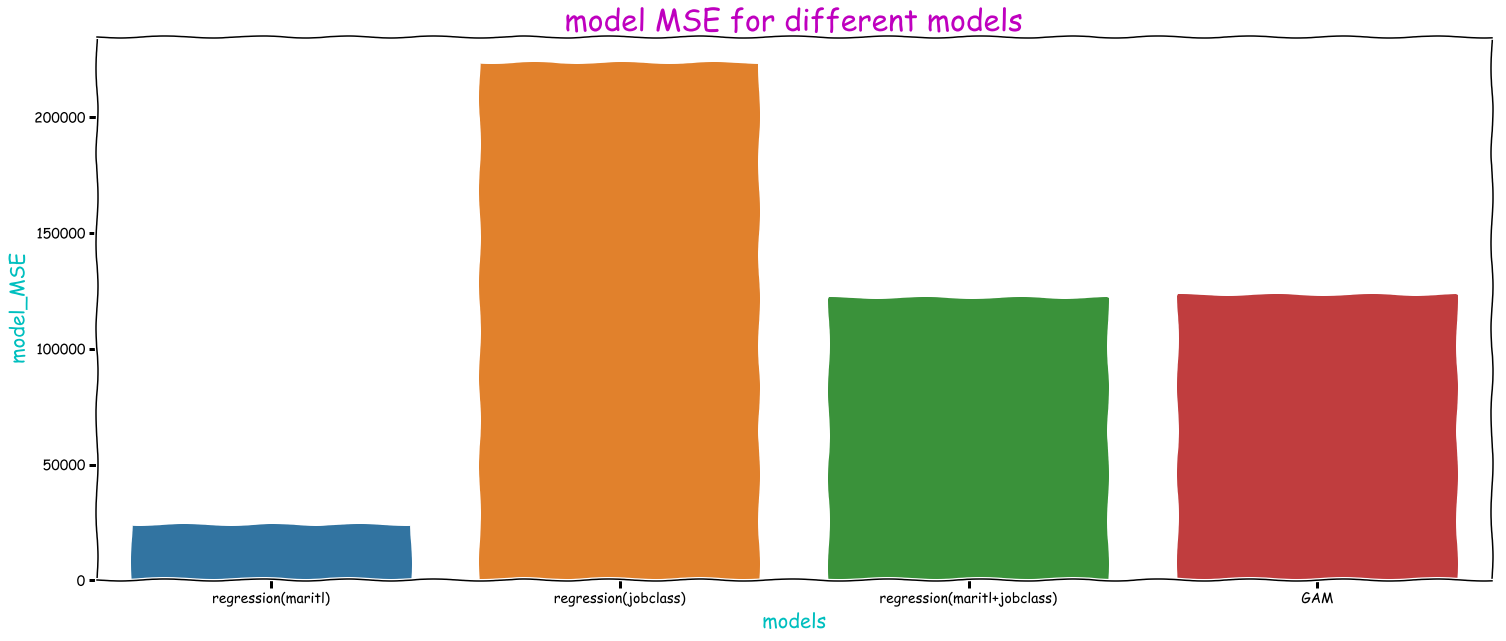

In [134]:
plt.xkcd()
plt.figure(figsize=(25, 10))
sns.barplot(x=MSE_df.index, y=MSE_df.model_MSE, data=MSE_df)
plt.xlabel('models', fontsize=20, color='c')
plt.ylabel('model_MSE', fontsize=20, color='c')
plt.title('model MSE for different models', fontsize=30, color='m')